In [1]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

#Classifiers
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('database_non-shows.xlsx')

In [3]:
x = data.drop('Appointment Type', axis=1)
y = data['Appointment Type']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes, binary= True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [ ]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print('accuracy_score: {0:.4f}'.format(acc_score))
        print('cohen_kappa_score: {0:.4f}'.format(c_k_s))
        print('log_loss: {0:.4f}'.format(log_metric))
        print('zero_one_loss: {0:.4f}'.format(zero_met))
        print('hemming_loss: {0:.4f}'.format(hl))
        print('matthews_corrcoef: {0:.4f}'.format(mc))
        print('recall: {0:.4f}'.format(recall))
        print('f1_score: {0:.4f}'.format(f1))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [ ]:
#classes
classes = [0, 1]

In [ ]:
# select classifiers
classifiers=[
GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5),
AdaBoostClassifier(DecisionTreeClassifier(ccp_alpha= 0.0, criterion="gini",max_depth=10,max_features=None,min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=10,splitter="best"), n_estimators=200, random_state=456, algorithm="SAMME", learning_rate=0.2),
RandomForestClassifier(n_estimators=200,criterion="gini",max_depth=20,min_samples_split=5,min_samples_leaf=1,max_features="log2"),
DecisionTreeClassifier(ccp_alpha= 0.0, criterion="gini",max_depth=10,max_features=None,min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=10,splitter="best"),
ExtraTreesClassifier(bootstrap=False, criterion= "entropy",max_depth= 20, max_features=None,min_samples_leaf=1, min_samples_split=20, n_estimators=100, random_state=42),
BaggingClassifier(RandomForestClassifier(n_estimators=200,criterion="gini",max_depth=20,min_samples_split=5,min_samples_leaf=1,max_features="log2"),n_estimators= 100, max_samples=0.9, max_features=0.9, bootstrap= False),
SVC(C= 10, gamma= "scale" , kernel= "rbf", tol=0.001),
]

names=['GB', 'ABDT', 'RF','DT', 'ET', 'BGRF', 'SVM']

Train runtime: 5.8362205028533936
Test runtime: 0.07169938087463379


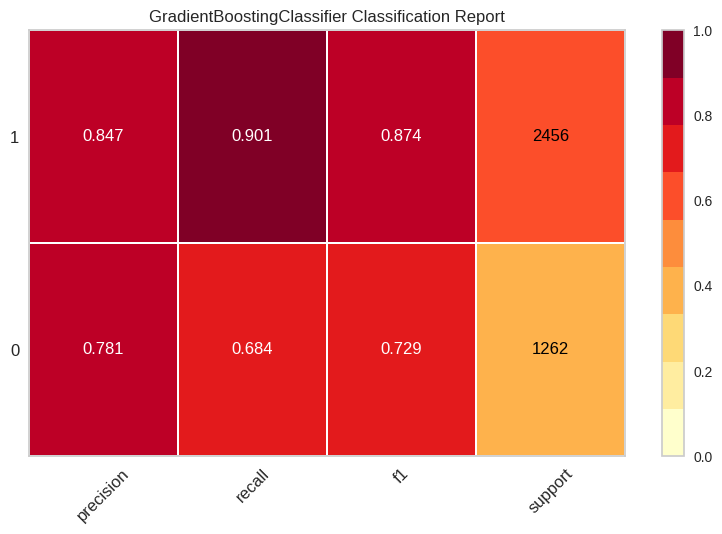

Train runtime: 8.988465785980225
Test runtime: 0.3134725093841553


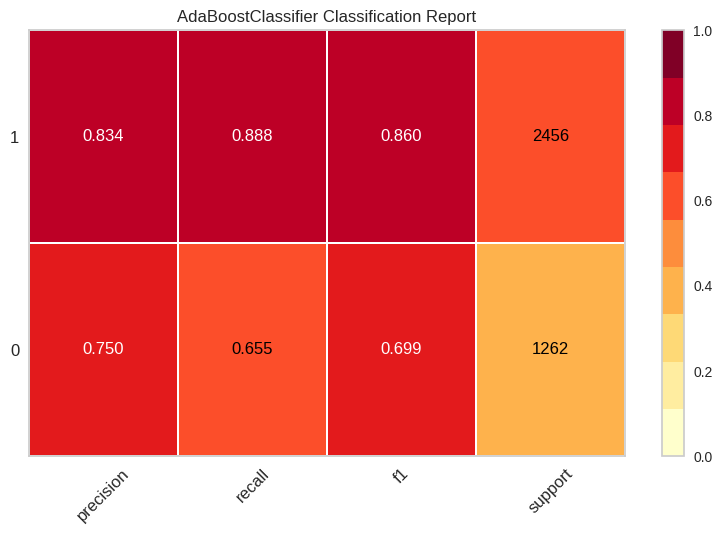

Train runtime: 4.016729831695557
Test runtime: 0.38224315643310547


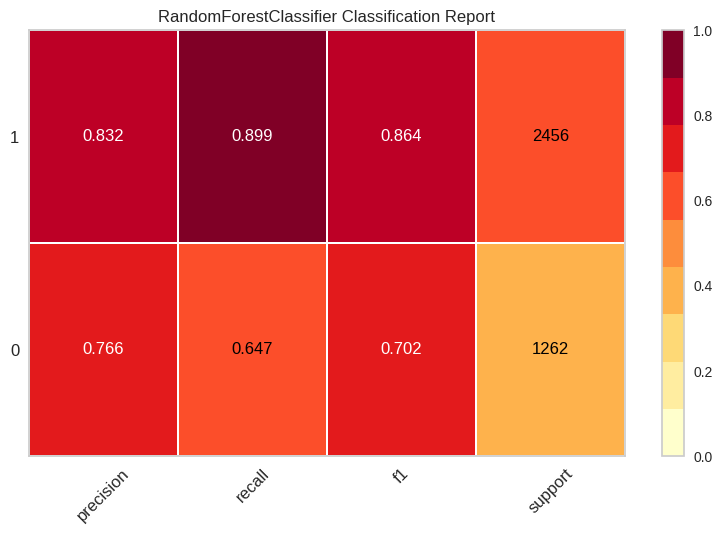

Train runtime: 0.04670572280883789
Test runtime: 0.037206172943115234


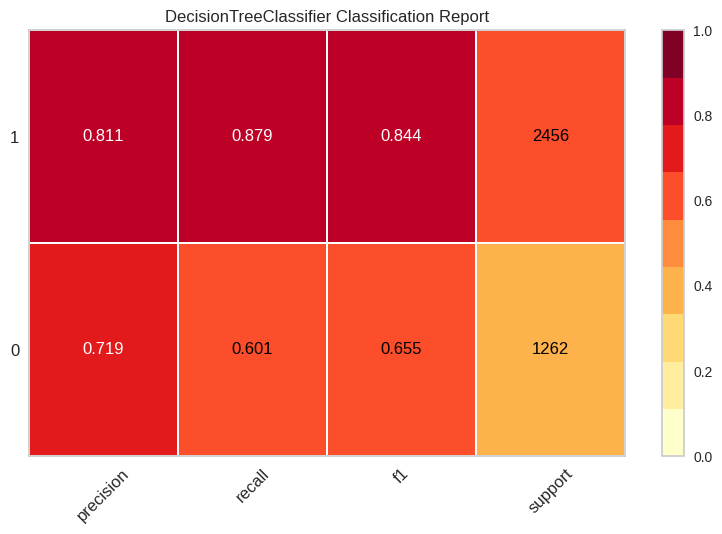

Train runtime: 2.2118639945983887
Test runtime: 0.20487737655639648


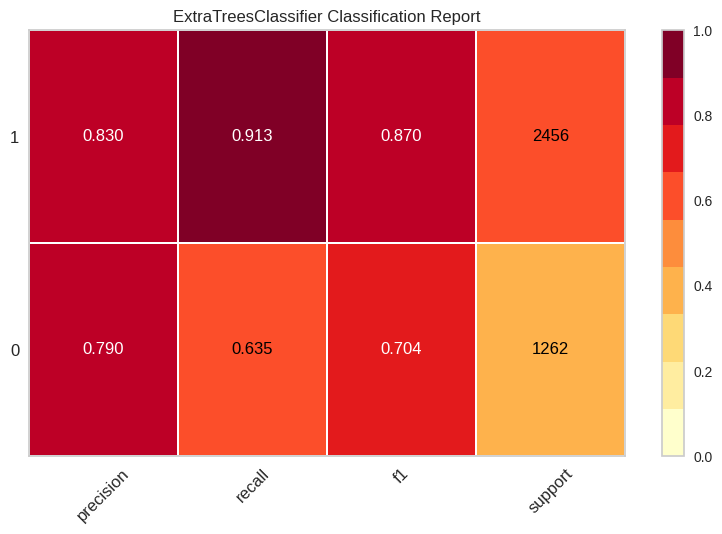

Train runtime: 335.53452610969543
Test runtime: 45.67902421951294


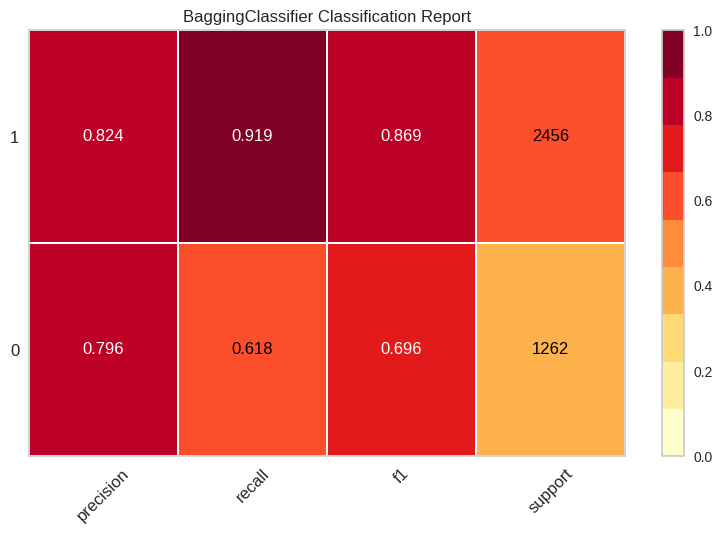

Train runtime: 14.540773153305054
Test runtime: 5.9764931201934814


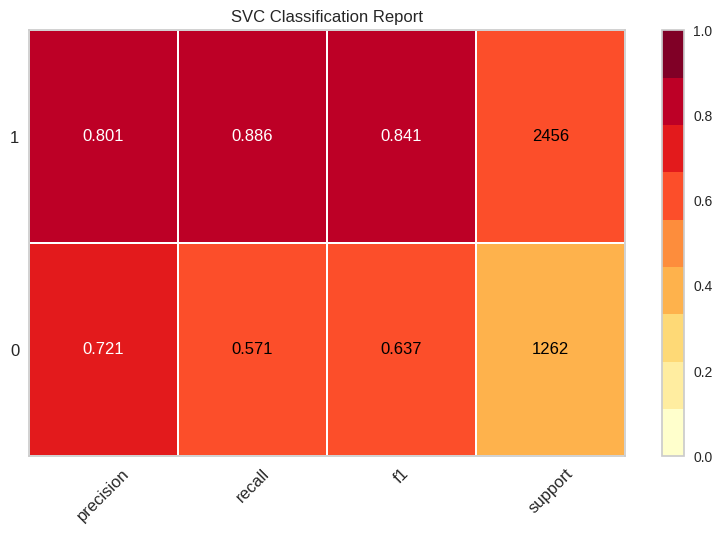

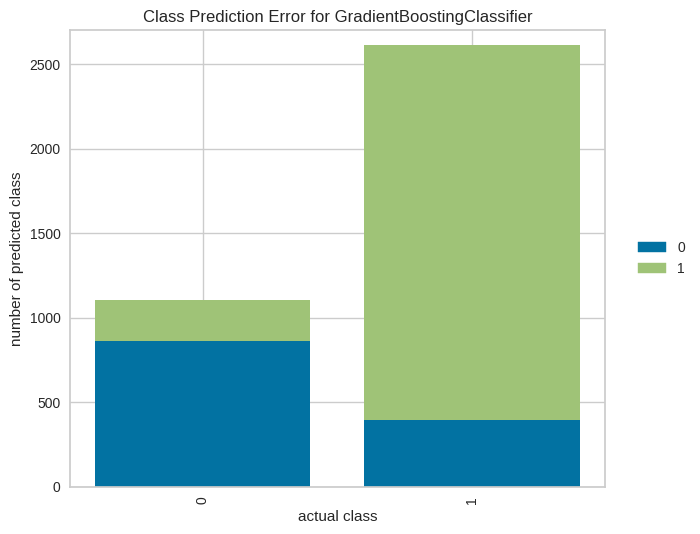

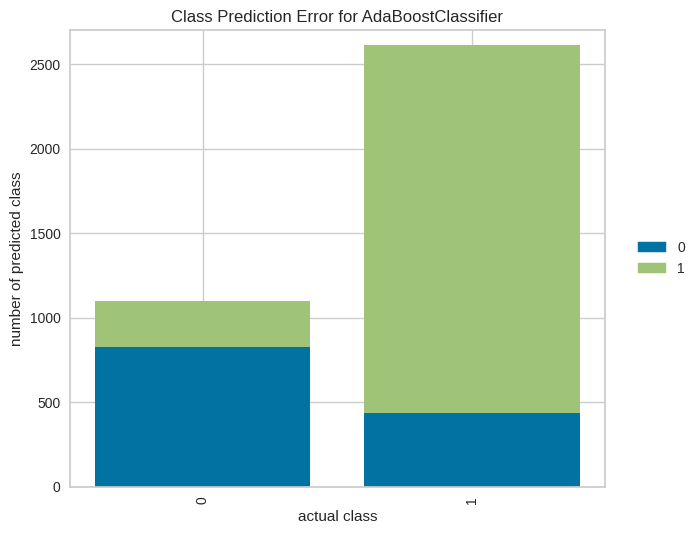

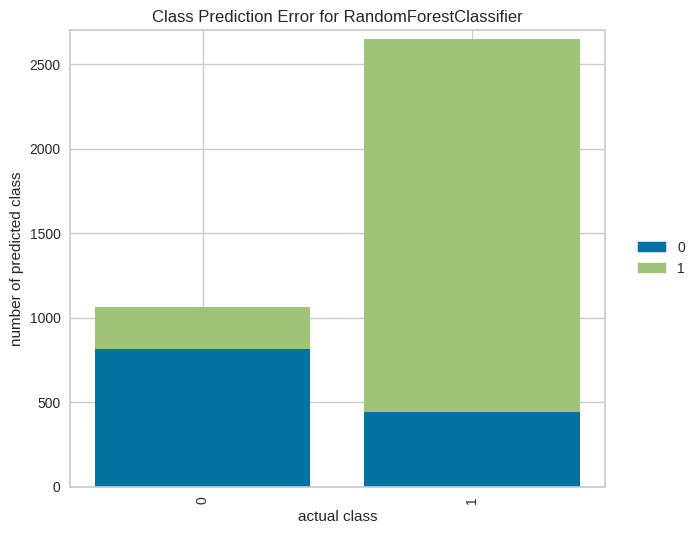

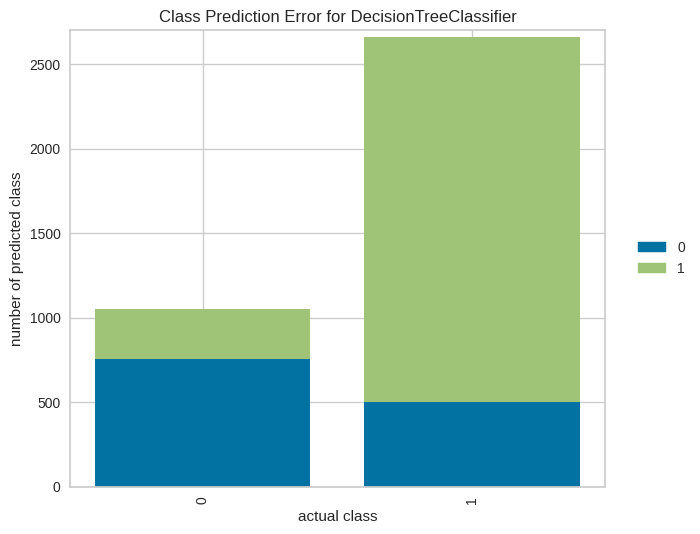

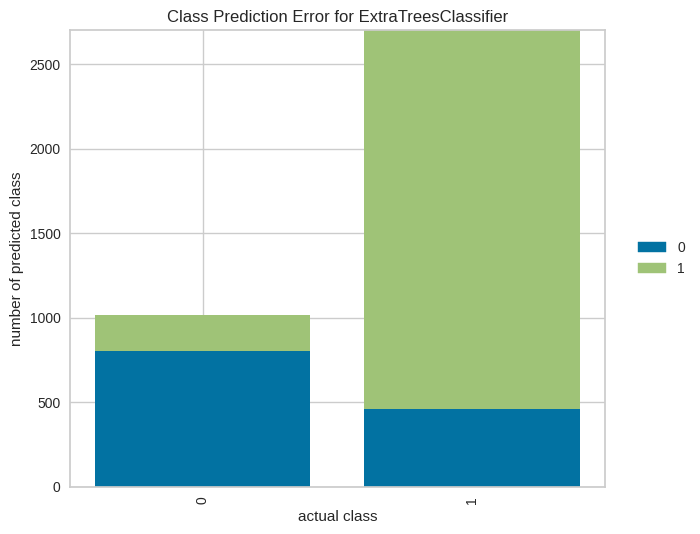

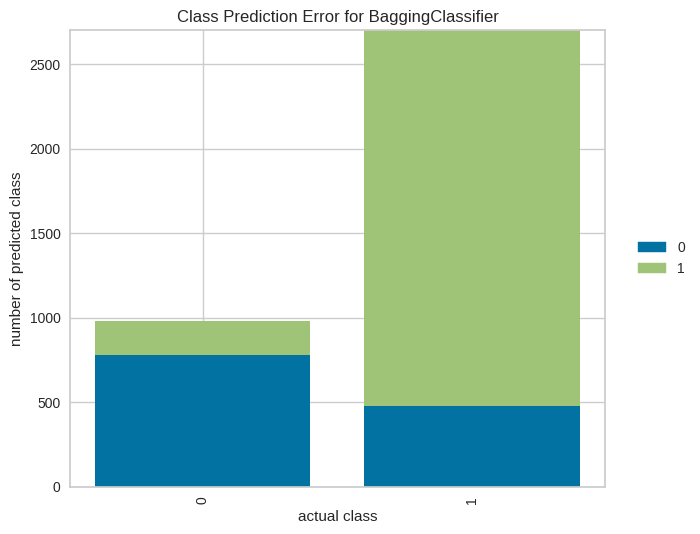

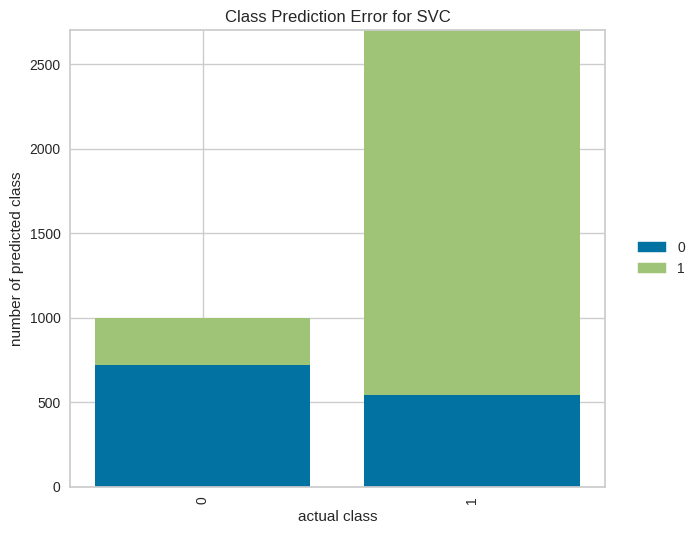

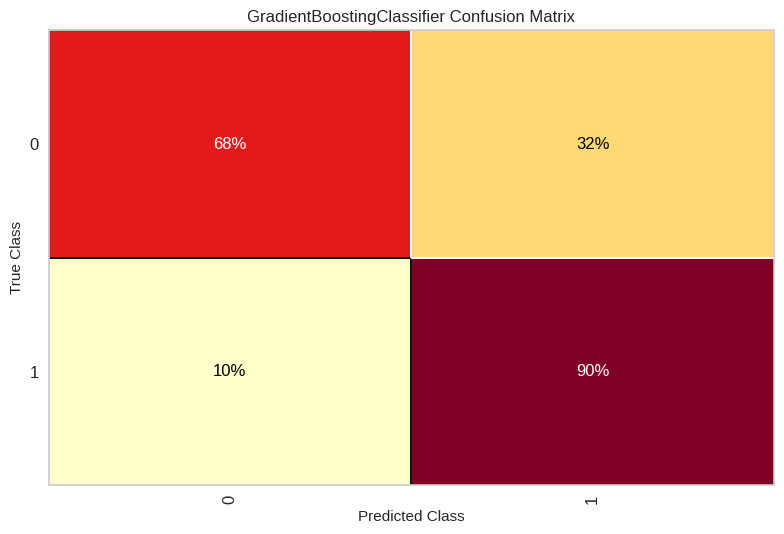

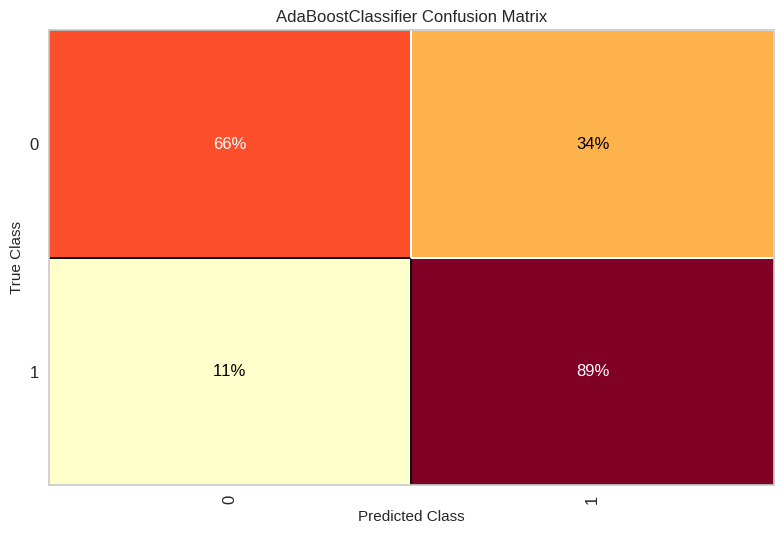

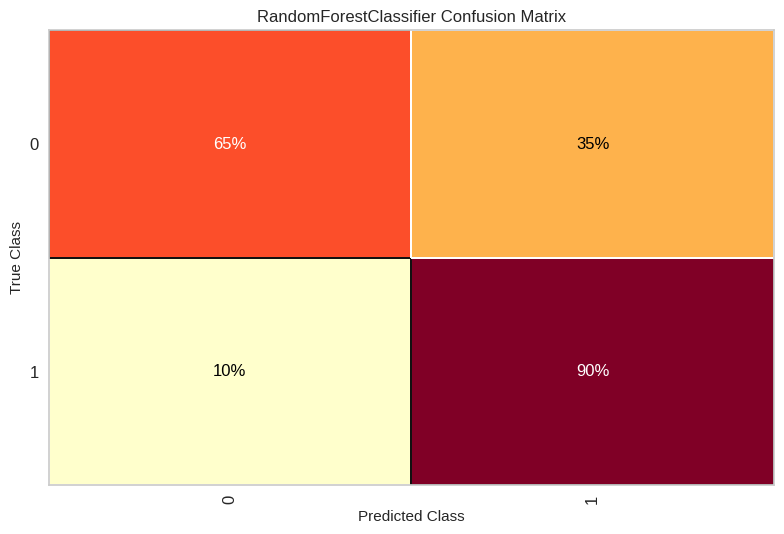

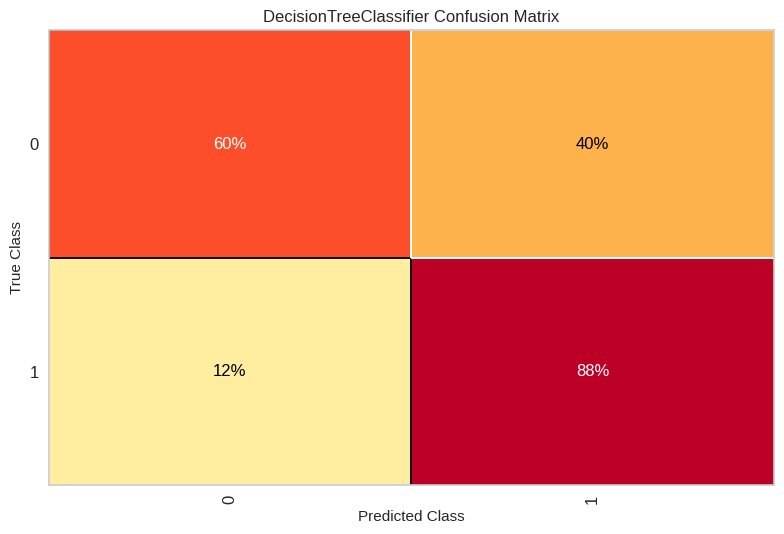

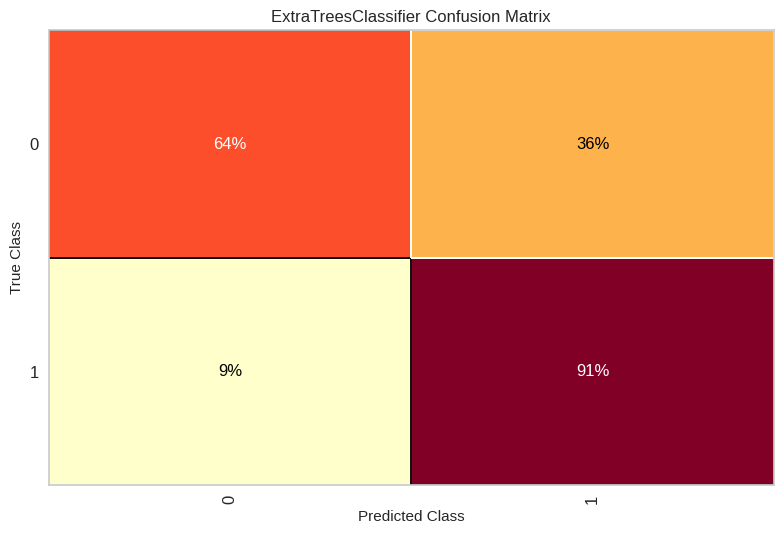

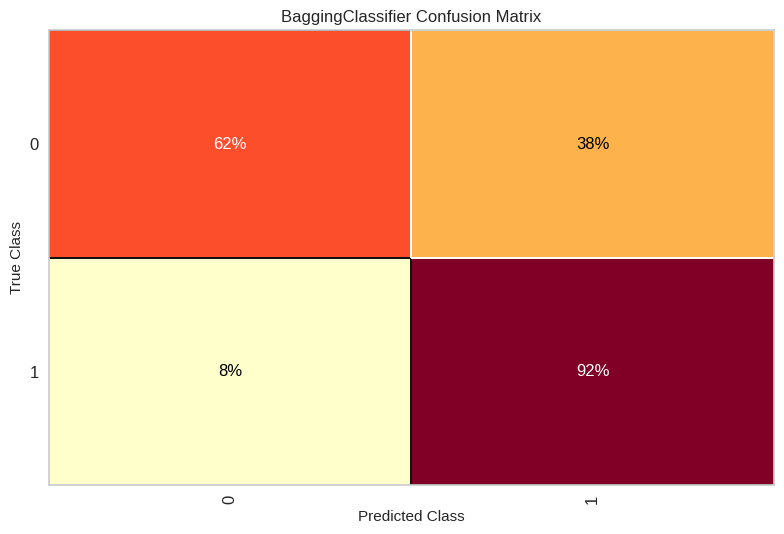

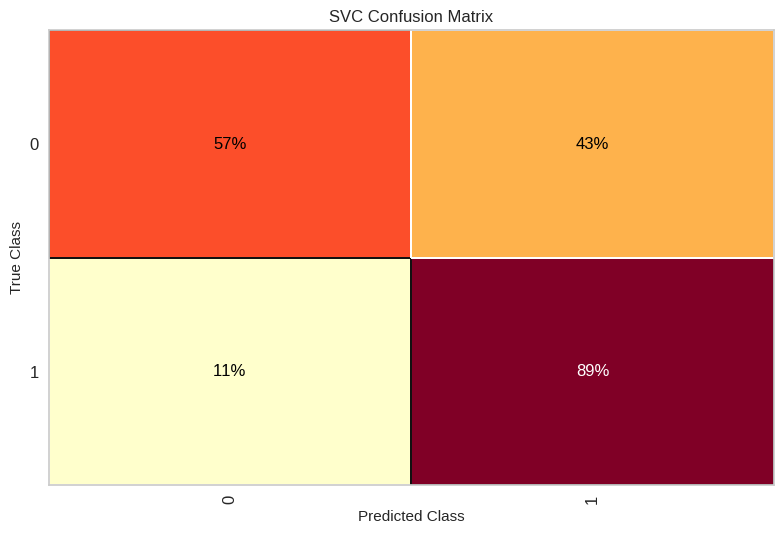

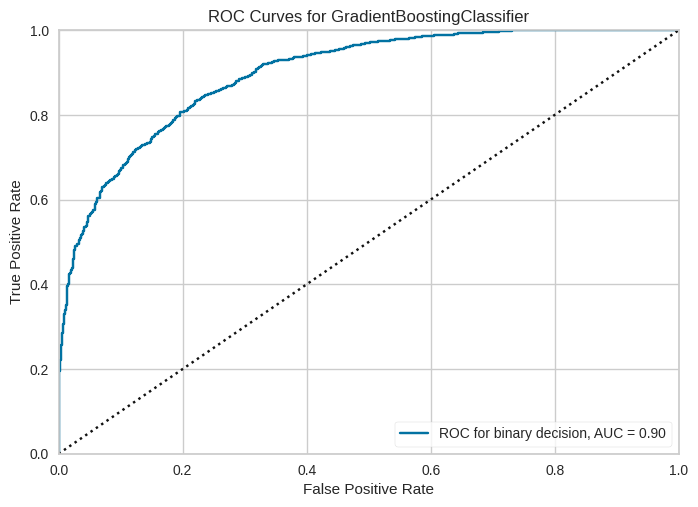

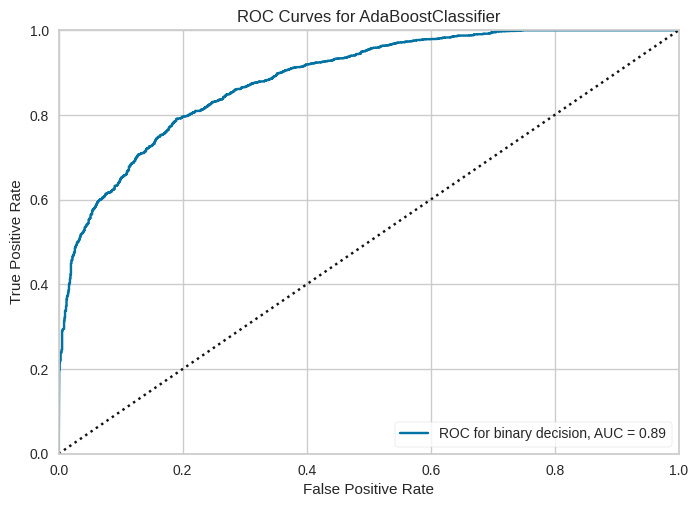

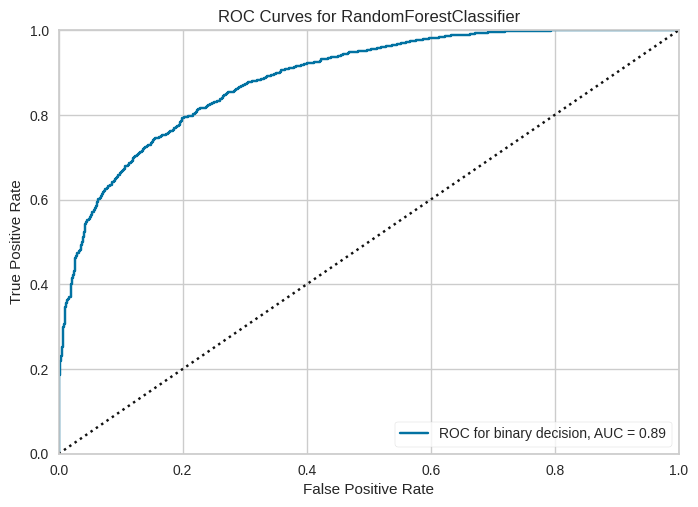

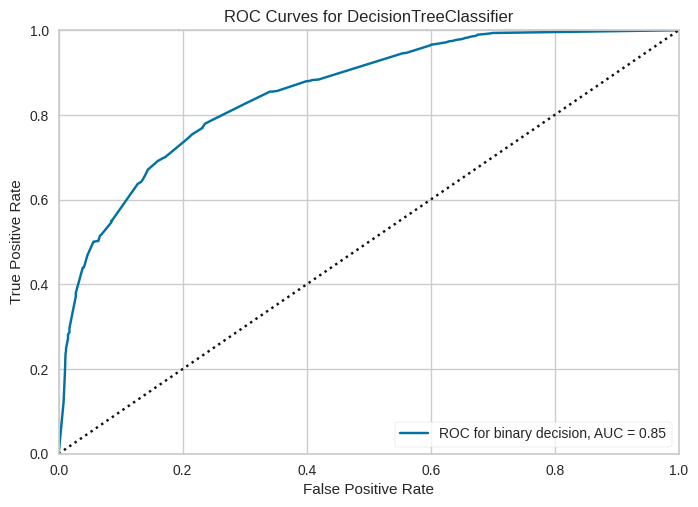

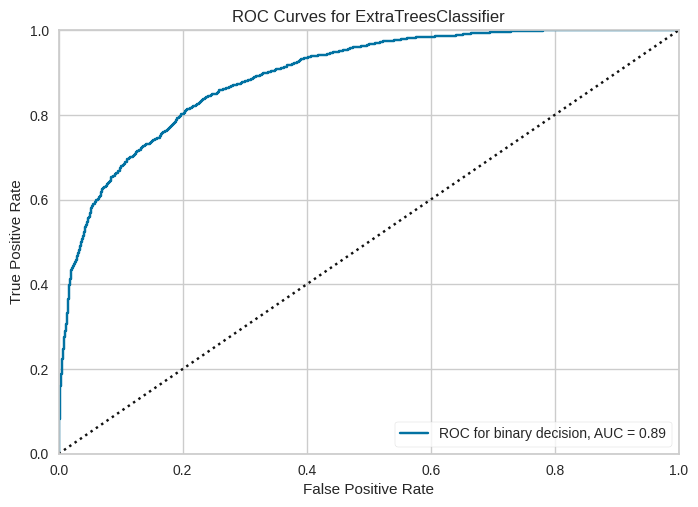

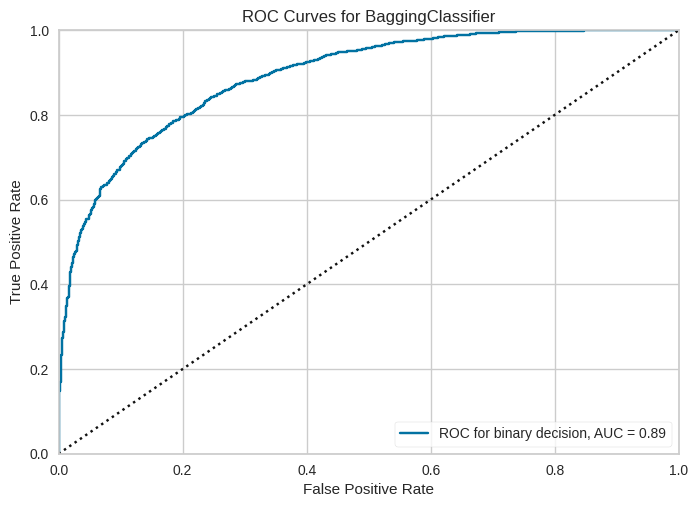

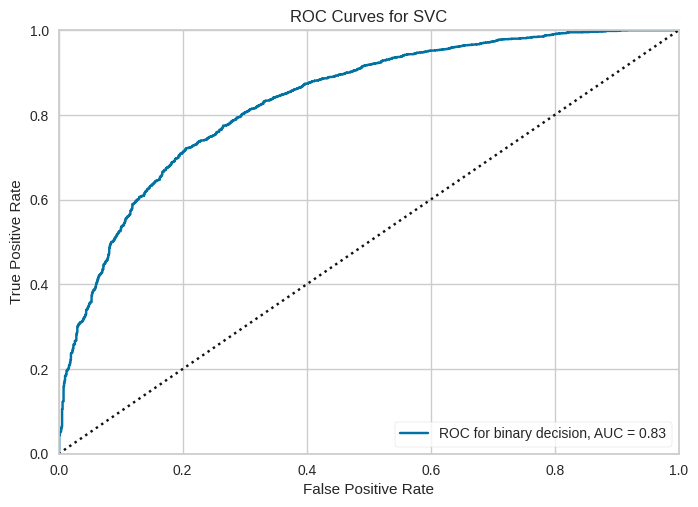

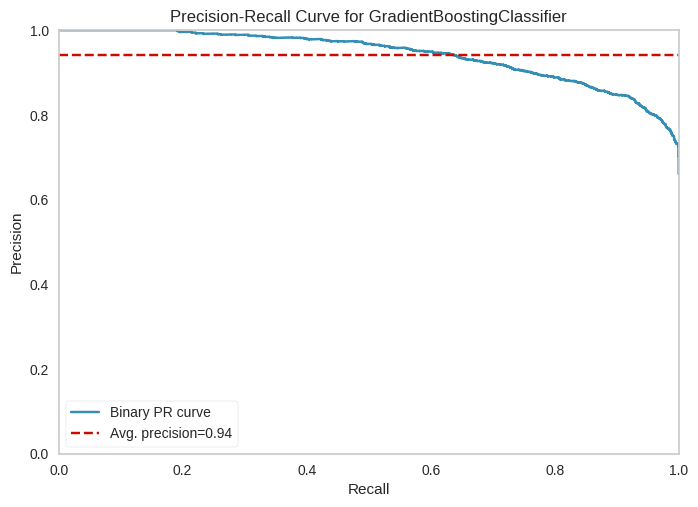

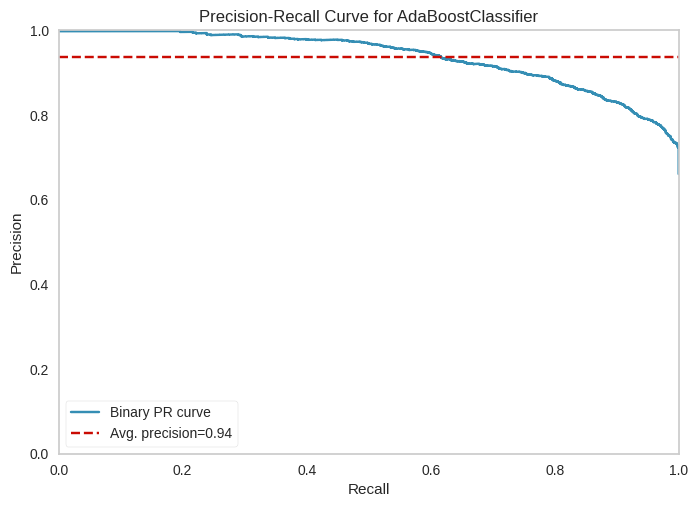

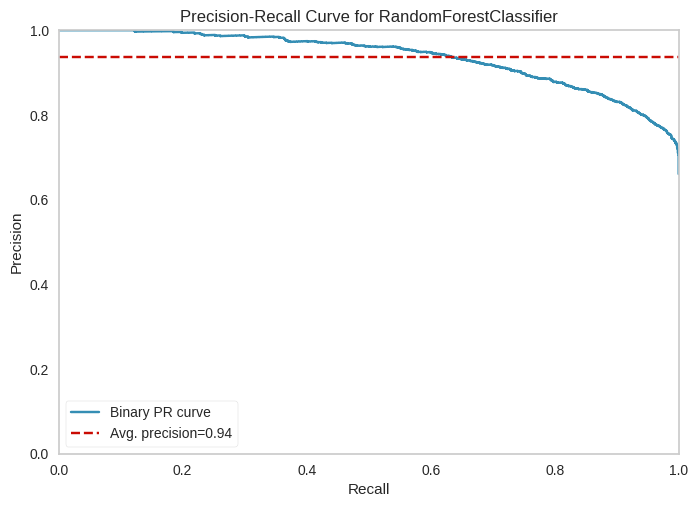

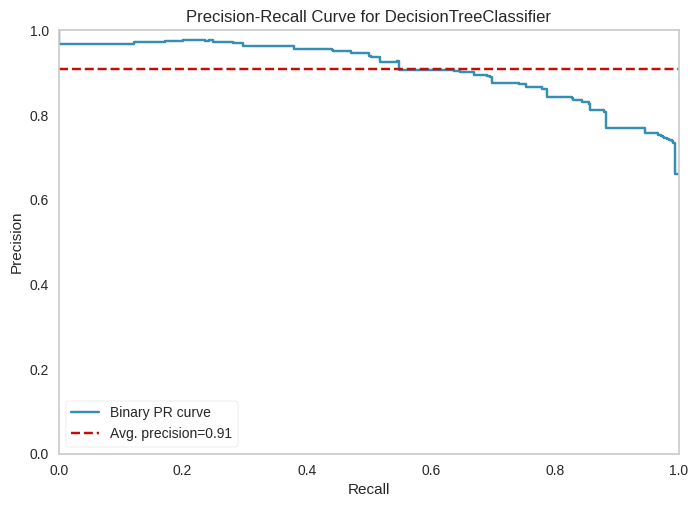

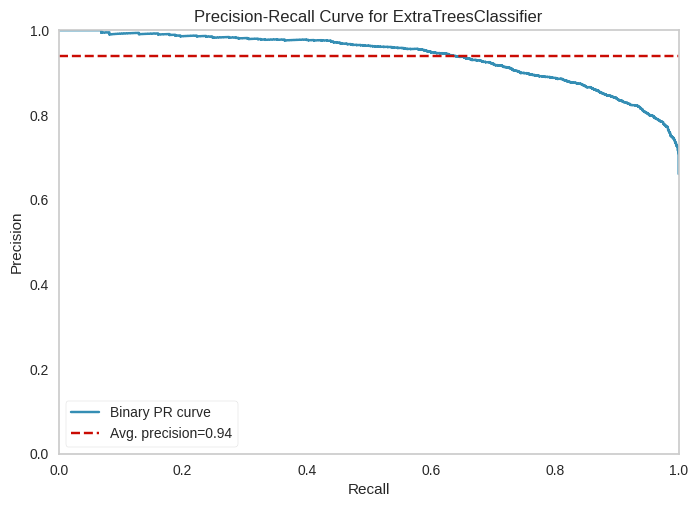

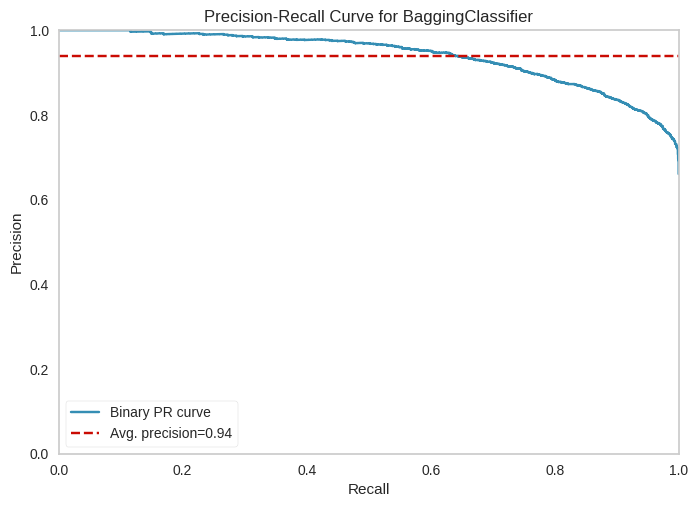

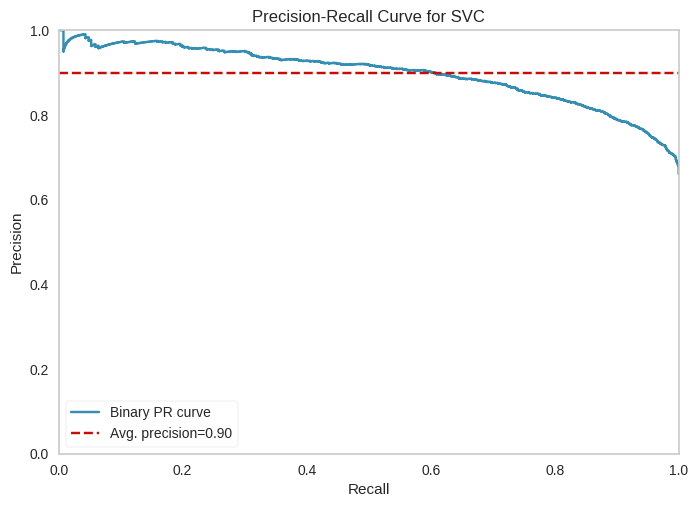

In [ ]:
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [ ]:
classifier_metrics()

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=200)
accuracy_score: 0.8276
cohen_kappa_score: 0.6036
log_loss: 0.3710
zero_one_loss: 0.1724
hemming_loss: 0.1724
matthews_corrcoef: 0.6064
recall: 0.9015
f1_score: 0.8735

---------------------------------------------------------------------------------
AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=10,
                                                    min_samples_split=10),
                   learning_rate=0.2, n_estimators=200, random_state=456)
accuracy_score: 0.8088
cohen_kappa_score: 0.5601
log_loss: 0.5485
zero_one_loss: 0.1912
hemming_loss: 0.1912
matthews_corrcoef: 0.5628
recall: 0.8876
f1_score: 0.8598

---------------------------------------------------------------------------------
RandomForestClassifier(max_depth=20, max_features='log2', min_samples_split=5,
                       n_estimators=200)
accuracy_score: 0.8098
cohen_kappa_score: 0.5592
l

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# select classifiers
classifiers=[
GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=5),
AdaBoostClassifier(DecisionTreeClassifier(ccp_alpha= 0.0, criterion="gini",max_depth=10,max_features=None,min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=10,splitter="best"), n_estimators=200, random_state=456, algorithm="SAMME", learning_rate=0.2),
RandomForestClassifier(n_estimators=200,criterion="gini",max_depth=20,min_samples_split=5,min_samples_leaf=1,max_features="log2"),
DecisionTreeClassifier(ccp_alpha= 0.0, criterion="gini",max_depth=10,max_features=None,min_impurity_decrease=0.0,min_samples_leaf=1,min_samples_split=10,splitter="best"),
ExtraTreesClassifier(bootstrap=False, criterion= "entropy",max_depth= 20, max_features=None,min_samples_leaf=1, min_samples_split=20, n_estimators=100, random_state=42),
BaggingClassifier(RandomForestClassifier(n_estimators=200,criterion="gini",max_depth=20,min_samples_split=5,min_samples_leaf=1,max_features="log2"),n_estimators= 100, max_samples=0.9, max_features=0.9, bootstrap= False),
SVC(C= 10, gamma= "scale" , kernel= "rbf", tol=0.001),
]

names=['GB', 'ABDT', 'RF','DT', 'ET', 'BGRF', 'SVM']


for i in range(len(classifiers)):
  print(names[i])
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Realiza la validación cruzada y obtén las puntuaciones de rendimiento
  puntuaciones = cross_val_score(classifiers[i], X_train, y_train, cv=kf)
  desviacion_estandar = np.std(puntuaciones)

  # Imprime las puntuaciones de rendimiento
  #print("Puntuaciones de rendimiento: ", puntuaciones)
  print("Puntuación media: ", np.mean(puntuaciones))
  print("Desviación estándar: ", desviacion_estandar)

GB
Puntuación media:  0.8201626338458364
Desviación estándar:  0.003099010408275256
ABDT
Puntuación media:  0.8108140265301863
Desviación estándar:  0.005372435498371652
RF
Puntuación media:  0.8109484802812853
Desviación estándar:  0.0038952160922792185
DT
Puntuación media:  0.7907720934272608
Desviación estándar:  0.005120357062141671
ET
Puntuación media:  0.8124947888992413
Desviación estándar:  0.008961123142278373
BGRF
Puntuación media:  0.8143782271784324
Desviación estándar:  0.005717742524056154
SVM
Puntuación media:  0.7683092463419373
Desviación estándar:  0.006163617249864197
